In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load in the data
minimum_wage_data = "Resources/Minimum Wage Data.csv"


minimum_wage_df = pd.read_csv(minimum_wage_data, encoding="ISO-8859-1")
minimum_wage_df.head()

minimmum_wage_by_state = minimum_wage_df.groupby(["State", "Year"])
minimmum_wage_by_state.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88
5,1968,Colorado,1.00 - 1.25(b),(b),1.25000,1.00000,34.783333,9.00,7.20
6,1968,Connecticut,1.40,NaN,1.40000,1.40000,34.783333,10.08,10.08
7,1968,Delaware,1.25,NaN,1.25000,1.25000,34.783333,9.00,9.00
8,1968,District of Columbia,1.25 - 1.40,NaN,1.40000,1.25000,34.783333,10.08,9.00
9,1968,Federal (FLSA),$1.15 & $1.60,NaN,1.60000,1.15000,34.783333,11.52,8.28


In [2]:
# import cleaned unemployment data

unemployment_data = "Resources/clean_unemployment_data.csv"

unemployment_df = pd.read_csv(unemployment_data)
# unemployment_df

In [46]:
# filtered minimum wage data for years between 2009-2017
mw = minimum_wage_df.drop(["Table_Data", "Footnote"], 1)
cmw = mw[mw["Year"]>2008]

cmw.head()

,Year,State,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
2255,2009,Alabama,0.00,0.00,214.537,0.00,0.00
2256,2009,Alaska,7.15,7.15,214.537,8.35,8.35
2257,2009,Arizona,7.25,7.25,214.537,8.46,8.46
2258,2009,Arkansas,6.25,6.25,214.537,7.29,7.29
2259,2009,California,8.00,8.00,214.537,9.34,9.34


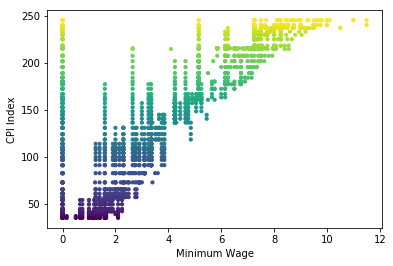

In [45]:
# created new dataframe to drop rows where minimum wage value is 0

mini_data = mw.replace({"High.2018":0}," ")
mini_data1 = mini_data.dropna()

# plotting adjusted minimum wage vs CPI
plt.xlabel("Minimum Wage")
plt.ylabel("CPI Index")

c = mini_data1["Year"]
plt.scatter(mini_data1["High.Value"], mini_data1["CPI.Average"], c=c, s=10)
plt.show()

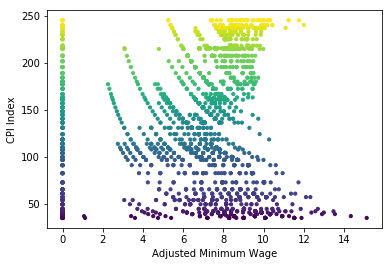

In [48]:
mini_data = mw.replace({"High.2018":0},None )
mini_data1 = mini_data.dropna()
# mini_data

plt.xlabel("Adjusted Minimum Wage")
plt.ylabel("CPI Index")

c = mini_data1["Year"]
plt.scatter(mini_data1["High.2018"], mini_data1["CPI.Average"], c=c, s=10)
plt.savefig("2018 adjusted minimum wage vs CPI.png")

In [24]:
# Merging data frames


Uemp_min_wage = pd.merge(unemployment_df, cmw, how="left", on=["Year", "State"])
type(Uemp_min_wage["Year"][0])
# Uemp_min_wage


numpy.int64

In [25]:
# crime_data = "Resources/crimetotal.csv"
# crime_df1 = crime_df.dropna()
# crime_df = pd.read_csv(crime_data)


In [26]:
# read in the crime data

crime_data = "Resources/crimetotal.csv"

crime_df = pd.read_csv(crime_data)
crime_df1 = crime_df.dropna()
crime_df1["Year"]=crime_df1['Year'].astype(int)
crime_df1



# type(crime_df["Year"][0])
cleaned = pd.merge(Uemp_min_wage, crime_df1, how="left", left_on=["Year","State"], right_on=["Year", "State"])

# cleaned_total_data = pd.concat([crime_df1, Uemp_min_wage],axis=1, sort=False)
# cleaned_tota crl_data
cleaned.head(50)

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,State,Year,Avg UI,High.Value,Low.Value,CPI.Average,High.2018,Low.2018,Unnamed: 0,Total Crime Rate
0,Alabama,2009,9.8,0.00,0.00,214.537,0.00,0.00,9.0,8460.9
1,Alaska,2009,8.4,7.15,7.15,214.537,8.35,8.35,24.0,7147.5
2,Arizona,2009,8.5,7.25,7.25,214.537,8.46,8.46,39.0,8031.0
3,Arkansas,2009,7.0,6.25,6.25,214.537,7.29,7.29,54.0,8581.8
4,California,2009,11.6,8.00,8.00,214.537,9.34,9.34,69.0,6408.7
5,Colorado,2009,7.3,7.28,7.28,214.537,8.50,8.50,84.0,6019.1
6,Connecticut,2009,8.0,8.00,8.00,214.537,9.34,9.34,99.0,5298.6
7,Delaware,2009,8.1,7.15,7.15,214.537,8.35,8.35,114.0,7998.3
8,D.C.,2009,10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Florida,2009,10.4,7.21,7.21,214.537,8.42,8.42,144.0,8906.6


In [27]:
# cleaning final dataframe

Semi_cleaned = cleaned.dropna()
Semi_cleaned

Final_cleaned = Semi_cleaned.drop(["Unnamed: 0"], axis=1)
# Final_cleaned

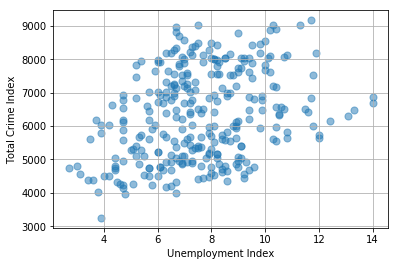

In [28]:
# plot Unemployment Index and Total crime Index 

x_axis = Final_cleaned["Avg UI"]
crime_rate = Final_cleaned["Total Crime Rate"]
plt.xlabel("Unemployment Index")
plt.ylabel("Total Crime Index")
plt.grid()
plt.scatter(x_axis, crime_rate, marker="o", s=50, alpha=0.5)
plt.show()

Text(0, 0.5, 'Unemployment Index')

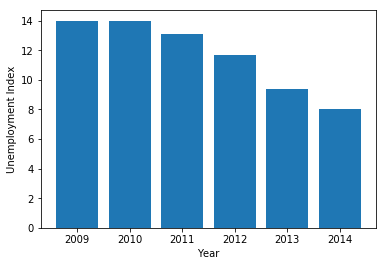

In [29]:
# plot bar of year vs unemployment 

plt.bar(Final_cleaned["Year"], Final_cleaned["Avg UI"],)

plt.xlabel("Year")
plt.ylabel("Unemployment Index")

Text(0, 0.5, 'Total Crime')

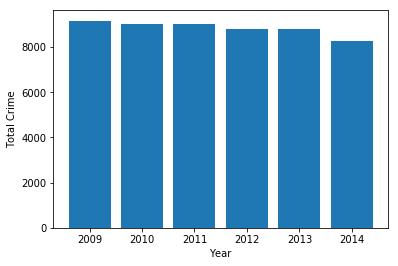

In [30]:
# plot a bar chart of year and crime index

plt.bar(Final_cleaned["Year"], Final_cleaned["Total Crime Rate"],)

plt.xlabel("Year")
plt.ylabel("Total Crime")